# Telecom customer churn prediction


Problem Statement :


"You have a telecom firm which has collected data of all its customers"
The main types of attributes are :
1. Demographics (age, gender etc.)
2. Services availed (internet packs purchased, special offers etc)
3. Expenses (amount of recharge done per month etc.)
Based on all this past information, you want to build a model which will predict whether a particular customer will churn or not.
So the variable of interest, i.e. the target variable here is ‘Churn’ which will tell us whether or not a particular customer has churned. It is a binary variable 1 means that the customer has churned and 0 means the customer has not churned.
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not.

DATA:-

    Data is available is three csv files and a data dictionary is provided to define/explain all the variables.

PROCEDURE:-

    Import the required libraries

1. Importing all datasets
2. Merging all datasets based on condition ("customer_id ")
3. Data Cleaning - checking the null values
4. Check for the missing values and replace them
5. Model building
    - Binary encoding
    - One hot encoding
    - Creating dummy variables and removing the extra columns
6. Feature selection using RFE - Recursive Feature Elimination
7. Getting the predicted values on train set
8. Creating a new column predicted with 1 if churn > 0.5 else 0
9. Create a confusion matrix on train set and test
10. Check the overall accuracy

# 

## LOGISTIC REGRESSION

### import librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#warning handling
import warnings
warnings.filterwarnings('ignore')

### import the dataset

In [4]:
df_churn=pd.read_csv('churn_data.csv')

In [5]:
df_churn

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [6]:
df_customer=pd.read_csv('customer_data.csv')

In [7]:
df_customer

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes


In [8]:
df_internet=pd.read_csv('internet_data.csv')

In [9]:
df_internet

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No


In [10]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [11]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7042 non-null   object
 1   gender         7042 non-null   object
 2   SeniorCitizen  7042 non-null   int64 
 3   Partner        7042 non-null   object
 4   Dependents     7042 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [12]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7042 non-null   object
 1   MultipleLines     7042 non-null   object
 2   InternetService   7042 non-null   object
 3   OnlineSecurity    7042 non-null   object
 4   OnlineBackup      7042 non-null   object
 5   DeviceProtection  7042 non-null   object
 6   TechSupport       7042 non-null   object
 7   StreamingTV       7042 non-null   object
 8   StreamingMovies   7042 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


### Merging all datasets based on condition ("customer_id ")

In [13]:
df1=pd.merge(df_churn, df_customer, on=['customerID'])
df1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [14]:
telecom=pd.merge(df1, df_internet, on=['customerID'])
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [15]:
telecom.shape

(7042, 21)

In [16]:
telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7042.0,32.366373,24.557955,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7042.0,64.755886,30.088238,18.25,35.5,70.35,89.85,118.75
SeniorCitizen,7042.0,0.162170,0.368633,0.00,0.0,0.00,0.00,1.00


In [17]:
telecom['customerID'].nunique()

7042

Customer id refers to unique customers. Its unique count is same as that of datasize which means here are no duplicates.

In [18]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


In telecom dataframe 'TotalCharges' column datatype is 'object' but actually it has numerical values. So, we need to change the datatype of 'TotalCharges' column

In [19]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In telecom dataframe 'SeniorCitizen' column datatype is 'int64' but actually it should have to be categorical values. So, we need to be convert it

In [20]:
telecom['SeniorCitizen'].replace({0:'No',1:'Yes'},inplace=True)

In [21]:
telecom['SeniorCitizen']

0        No
1        No
2        No
3        No
4        No
       ... 
7037     No
7038     No
7039     No
7040     No
7041    Yes
Name: SeniorCitizen, Length: 7042, dtype: object

Types of variables

In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

First of all, I will find categorical variables

In [22]:
col=telecom.columns
col

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [23]:
categorical = [ var for var in telecom.columns if telecom[var].dtype=='O']
print('There are '+str(len(categorical))+' Categorical variables')
categorical

There are 18 Categorical variables


['customerID',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [24]:
numerical = [ var for var in telecom.columns if telecom[var].dtype!='O']
print('There are '+str(len(numerical))+' Numerical variables ')
numerical

There are 3 Numerical variables 


['tenure', 'MonthlyCharges', 'TotalCharges']

In [25]:
telecom[categorical].head()

,customerID,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No,Month-to-month,Yes,Electronic check,No,Female,No,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,One year,No,Mailed check,No,Male,No,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Yes,Month-to-month,Yes,Mailed check,Yes,Male,No,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No,One year,No,Bank transfer (automatic),No,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Yes,Month-to-month,Yes,Electronic check,Yes,Female,No,No,No,No,Fiber optic,No,No,No,No,No,No


In [26]:
telecom[numerical].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [27]:
telecom[categorical].isnull().sum()

customerID          0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [28]:
telecom[numerical].isnull().sum()

tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64

In [29]:
round(100*(telecom.TotalCharges.isnull().sum()/len(telecom.TotalCharges)),2)

0.16

There are 0.16% null values in 'TotalCharges' column so we can drop them for further analysis

In [30]:
telecom.dropna(axis=0, inplace=True)

In [31]:
telecom.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64



Number of labels: cardinality


The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.



In [32]:
for i in telecom[categorical].columns:
    print(i,' contains',telecom[i].nunique(),' labels')

customerID  contains 7031  labels
PhoneService  contains 2  labels
Contract  contains 3  labels
PaperlessBilling  contains 2  labels
PaymentMethod  contains 4  labels
Churn  contains 2  labels
gender  contains 2  labels
SeniorCitizen  contains 2  labels
Partner  contains 2  labels
Dependents  contains 2  labels
MultipleLines  contains 3  labels
InternetService  contains 3  labels
OnlineSecurity  contains 3  labels
OnlineBackup  contains 3  labels
DeviceProtection  contains 3  labels
TechSupport  contains 3  labels
StreamingTV  contains 3  labels
StreamingMovies  contains 3  labels


In [33]:
telecom[categorical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 7041
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7031 non-null   object
 1   PhoneService      7031 non-null   object
 2   Contract          7031 non-null   object
 3   PaperlessBilling  7031 non-null   object
 4   PaymentMethod     7031 non-null   object
 5   Churn             7031 non-null   object
 6   gender            7031 non-null   object
 7   SeniorCitizen     7031 non-null   object
 8   Partner           7031 non-null   object
 9   Dependents        7031 non-null   object
 10  MultipleLines     7031 non-null   object
 11  InternetService   7031 non-null   object
 12  OnlineSecurity    7031 non-null   object
 13  OnlineBackup      7031 non-null   object
 14  DeviceProtection  7031 non-null   object
 15  TechSupport       7031 non-null   object
 16  StreamingTV       7031 non-null   object
 17  StreamingMovie

In [34]:
telecom['TotalCharges'].describe()

count    7031.000000
mean     2282.651714
std      2266.279660
min        18.800000
25%       401.400000
50%      1397.300000
75%      3793.050000
max      8684.800000
Name: TotalCharges, dtype: float64

### Exploratory Data Analytics

In [35]:
for i in categorical[1:]:
    print(i,'has',len(telecom[i].unique()),'unique values that are',telecom[i].unique(),'\n')

PhoneService has 2 unique values that are ['No' 'Yes'] 

Contract has 3 unique values that are ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling has 2 unique values that are ['Yes' 'No'] 

PaymentMethod has 4 unique values that are ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

Churn has 2 unique values that are ['No' 'Yes'] 

gender has 2 unique values that are ['Female' 'Male'] 

SeniorCitizen has 2 unique values that are ['No' 'Yes'] 

Partner has 2 unique values that are ['Yes' 'No'] 

Dependents has 2 unique values that are ['No' 'Yes'] 

MultipleLines has 3 unique values that are ['No phone service' 'No' 'Yes'] 

InternetService has 3 unique values that are ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity has 3 unique values that are ['No' 'Yes' 'No internet service'] 

OnlineBackup has 3 unique values that are ['Yes' 'No' 'No internet service'] 

DeviceProtection has 3 unique values that are ['No' 'Yes' 'No internet service'] 



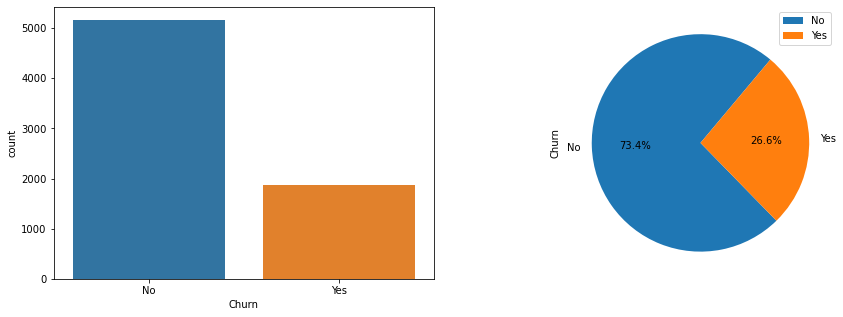

In [36]:
fig ,axes = plt.subplots(1,2,figsize=(15,5))
fig1 = sns.countplot(telecom['Churn'], ax = axes[0])

df_chart = pd.DataFrame(telecom['Churn'].value_counts())

df_chart.plot.pie( subplots=True,labels = df_chart.index.values, autopct='%1.1f%%', figsize = (15,5), startangle= 50, 
                  ax = axes[1])
# Unsquish the pie.
plt.gca().set_aspect('equal')

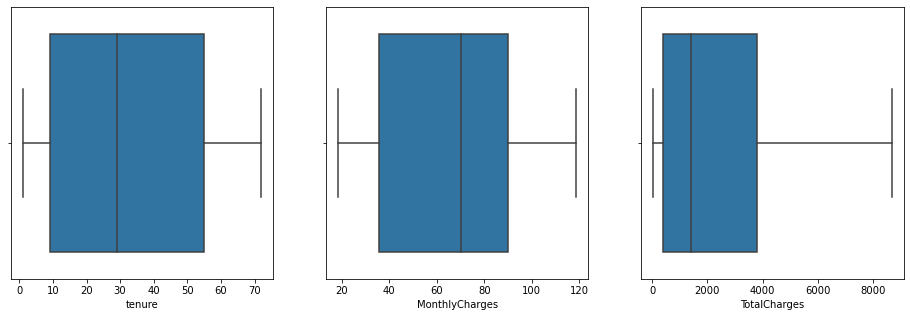

In [37]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
fig = sns.boxplot(data = telecom, x = 'tenure')

plt.subplot(1,3,2)
fig = sns.boxplot(data = telecom, x = 'MonthlyCharges')

plt.subplot(1,3,3)
fig = sns.boxplot(data = telecom, x = 'TotalCharges')

There is no outliers in numerical columns 'tenure','MonthlyCharges','TotalCharges'

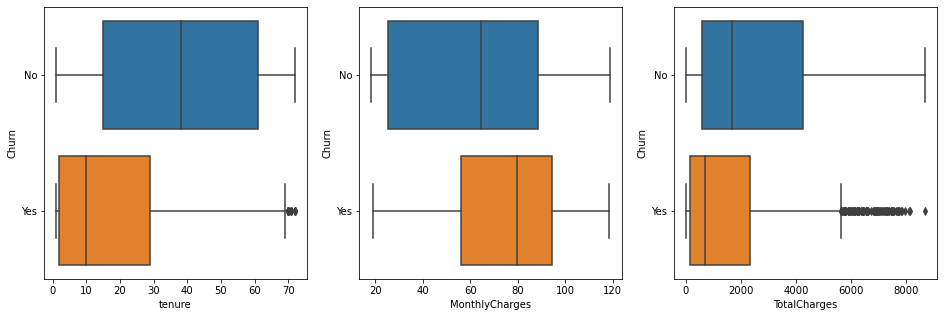

In [38]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
fig = sns.boxplot(data = telecom, x = 'tenure', y = 'Churn')

plt.subplot(1,3,2)
fig = sns.boxplot(data = telecom, x = 'MonthlyCharges',  y = 'Churn')

plt.subplot(1,3,3)
fig = sns.boxplot(data = telecom, x = 'TotalCharges', y = 'Churn')

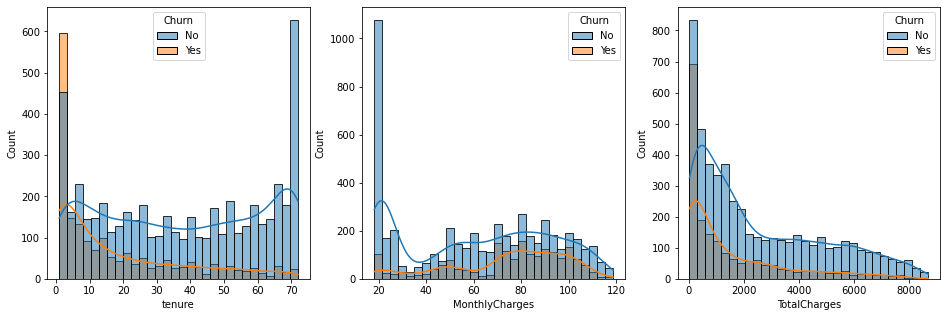

In [39]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
fig = sns.histplot(data= telecom, x='tenure',hue='Churn',kde=True,bins=30)

plt.subplot(1,3,2)
fig = sns.histplot(data= telecom, x='MonthlyCharges',hue='Churn',kde=True,bins=30)

plt.subplot(1,3,3)
fig = sns.histplot(data= telecom, x='TotalCharges',hue='Churn',kde=True,bins=30)

In [40]:
categorical

['customerID',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [41]:
def createfig(i):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plt.title(i)
    fig1 = sns.countplot(data=telecom, x = i,)
    plt.subplot(1,2,2)
    plt.title('Based on Churn')
    fig2 = sns.countplot(data=telecom, x = i, hue = 'Churn')
    plt.tight_layout()

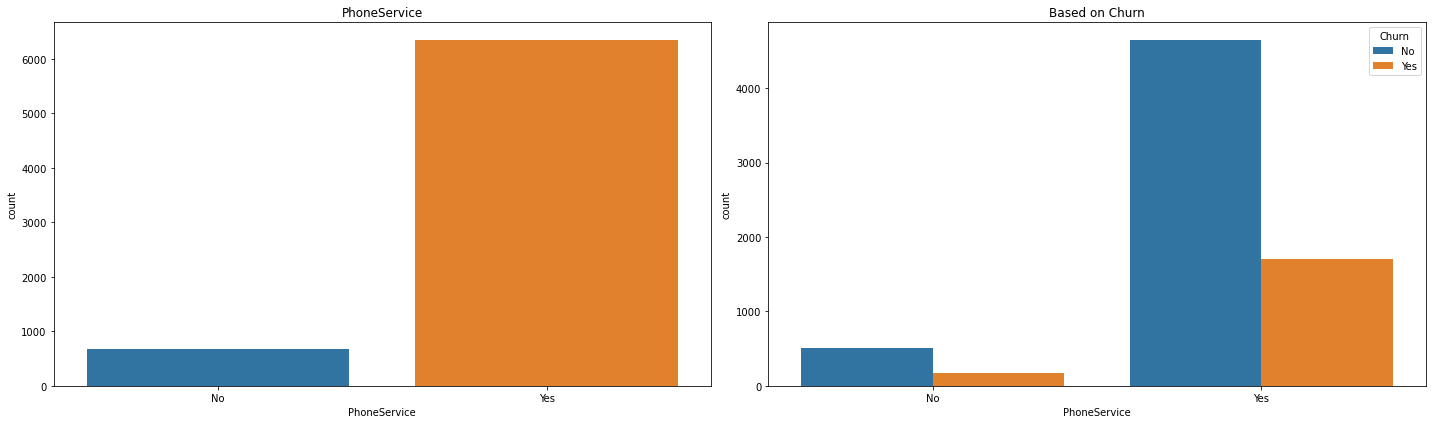

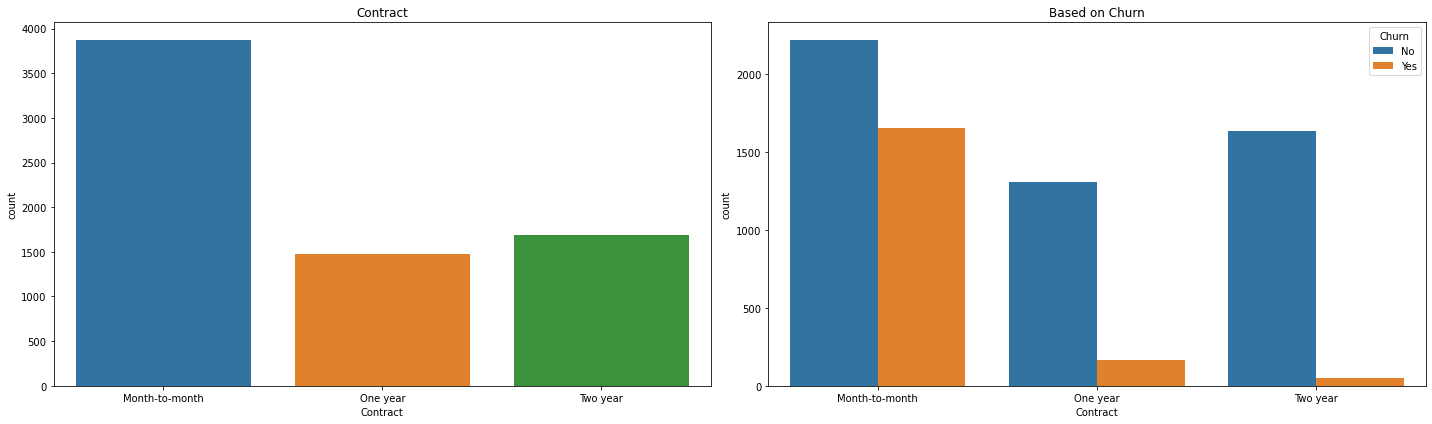

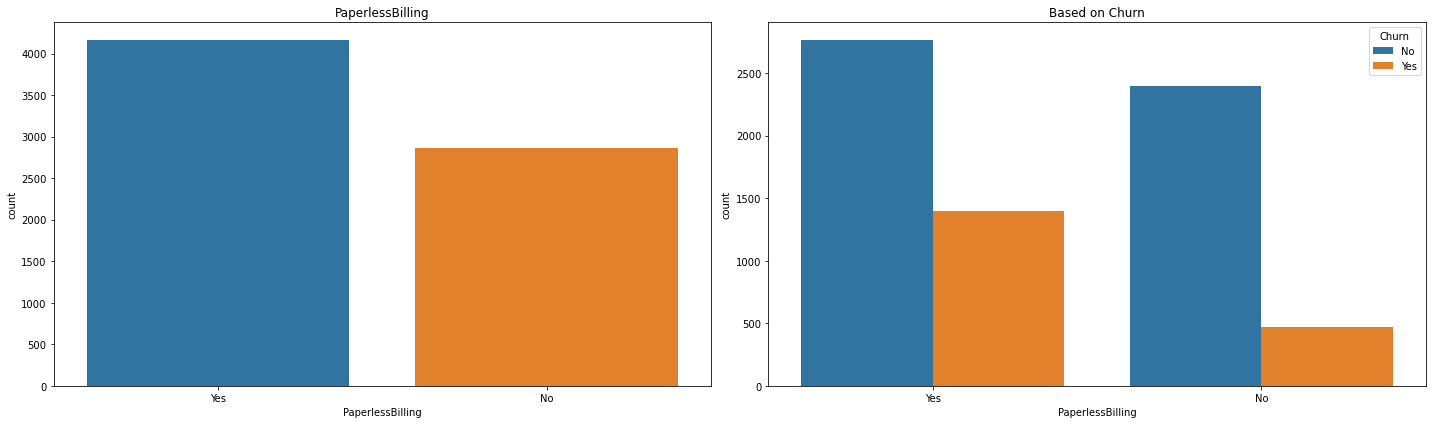

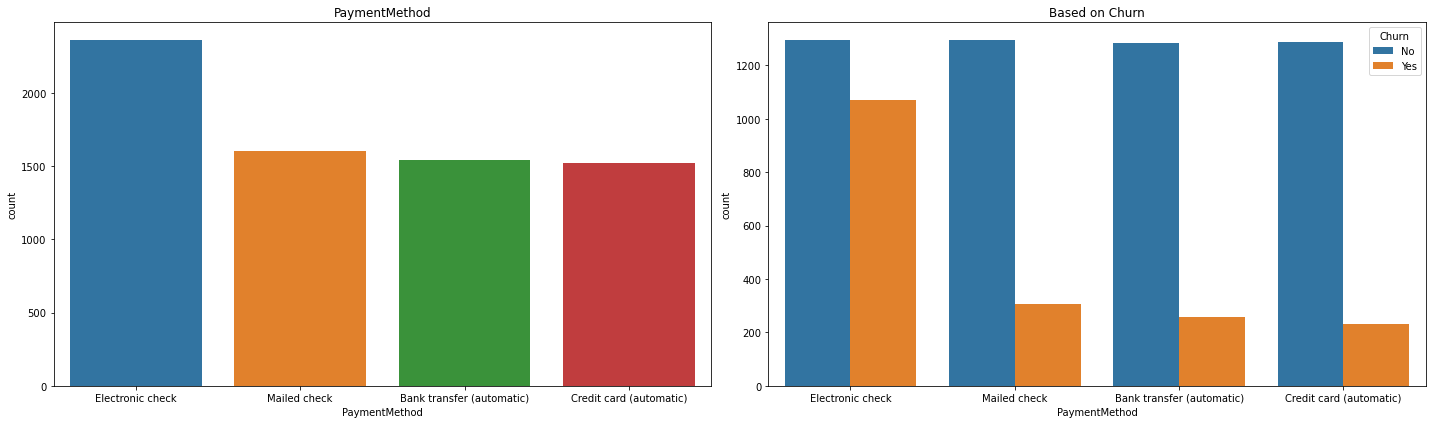

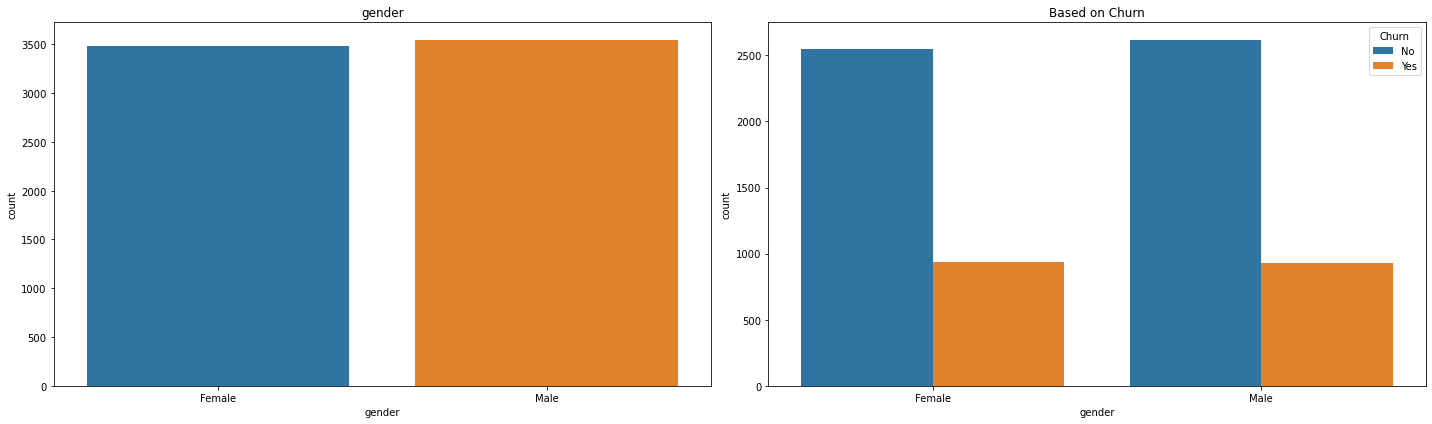

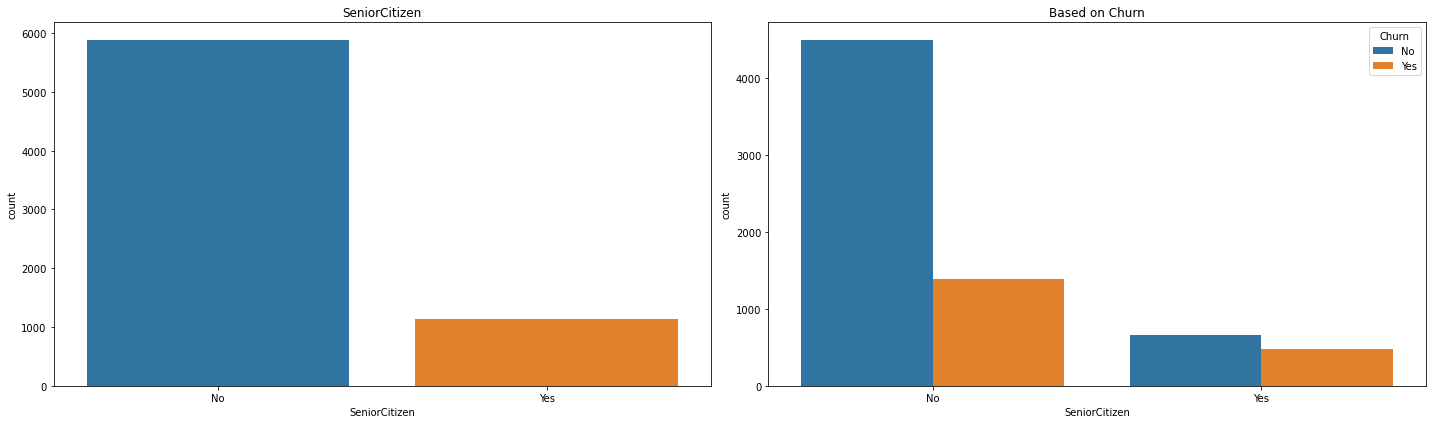

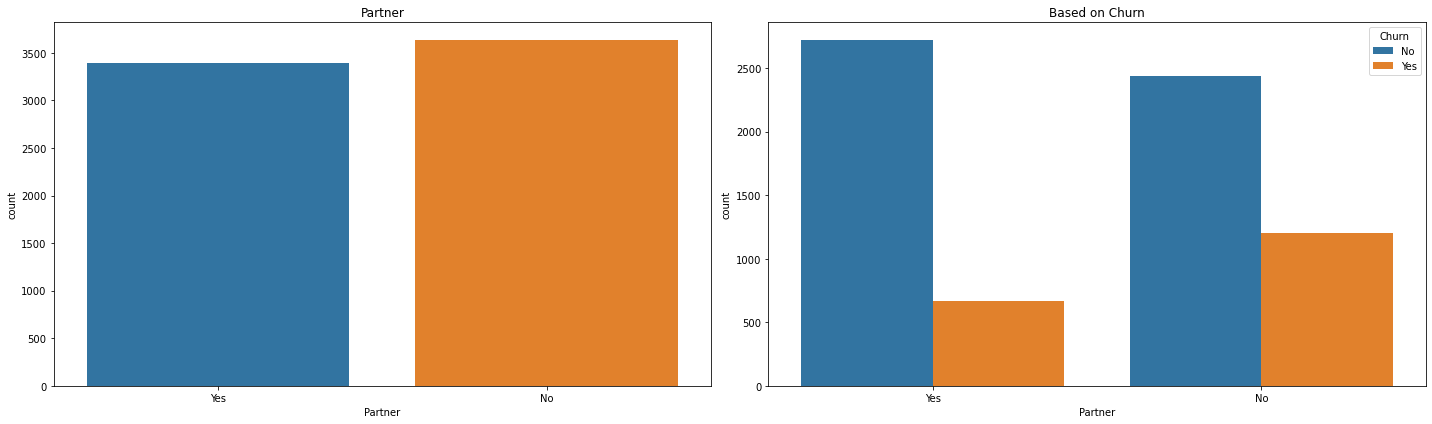

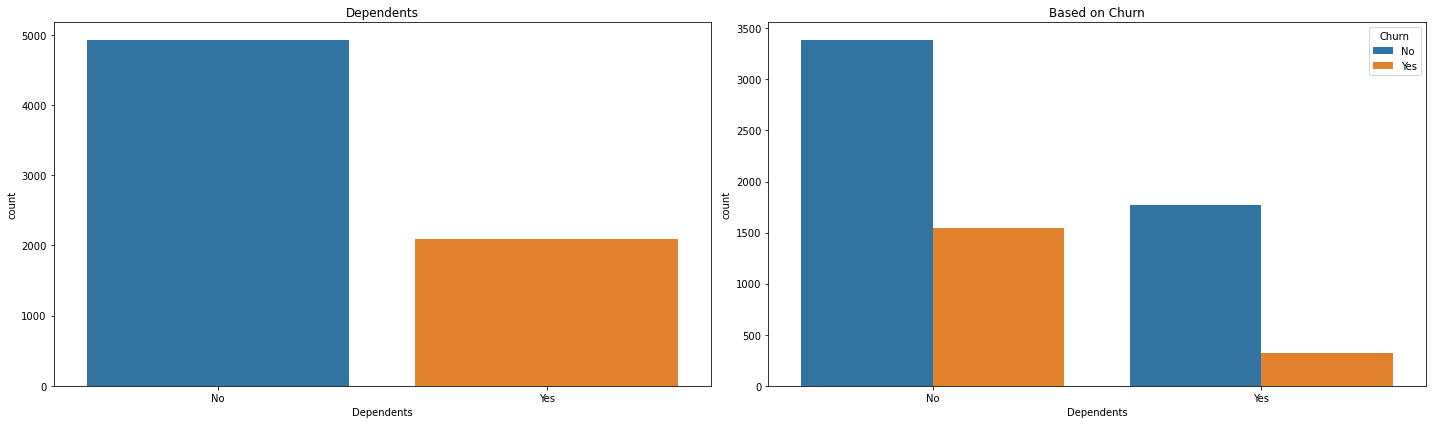

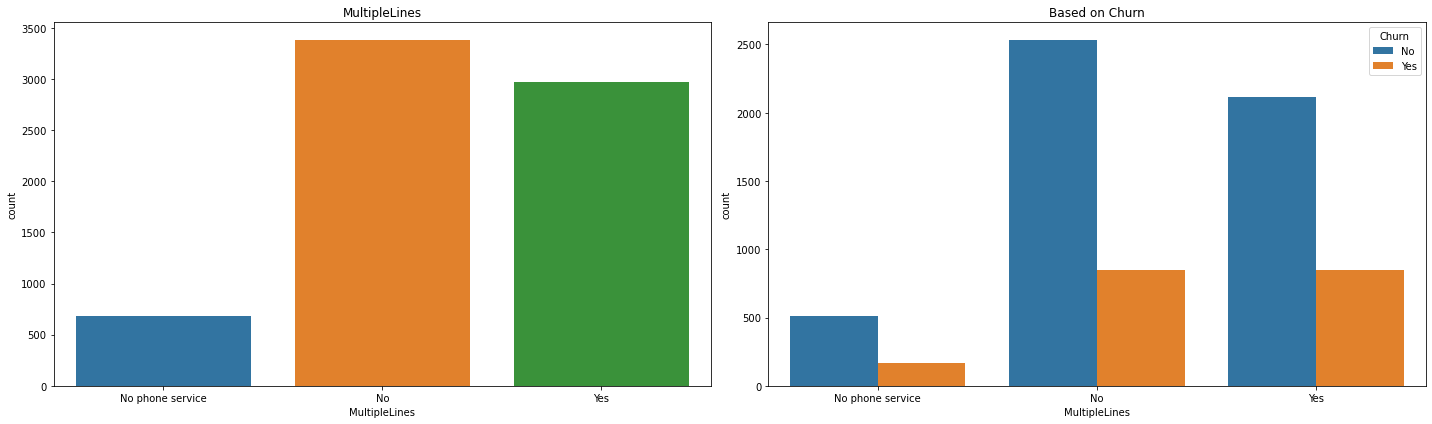

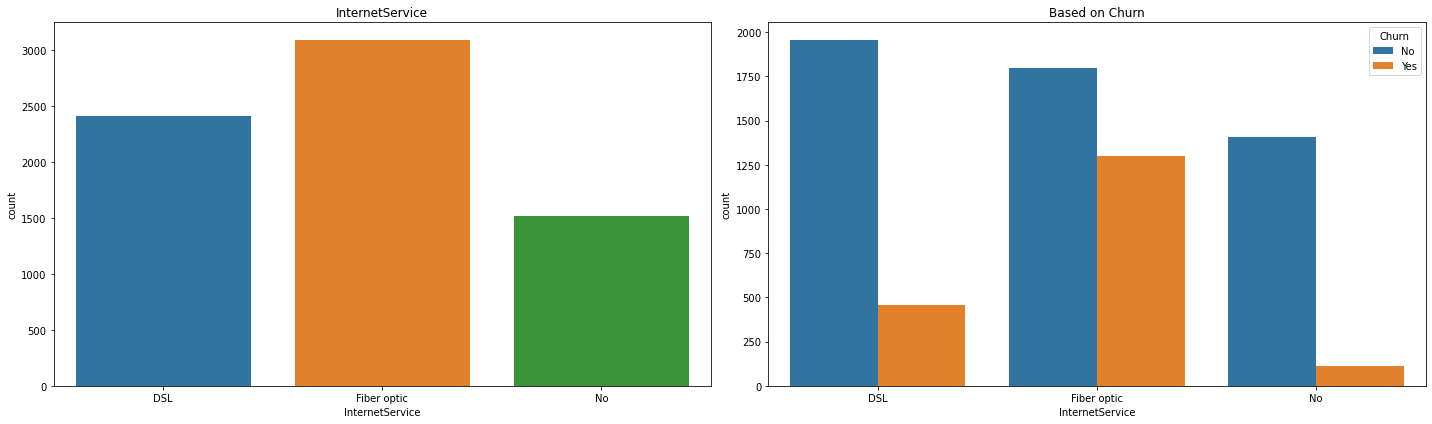

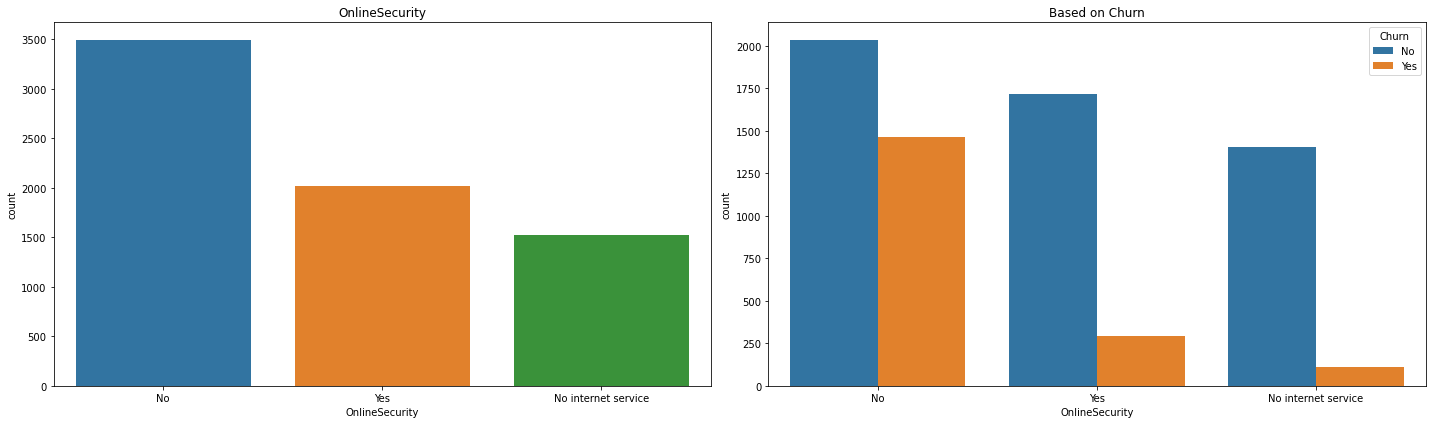

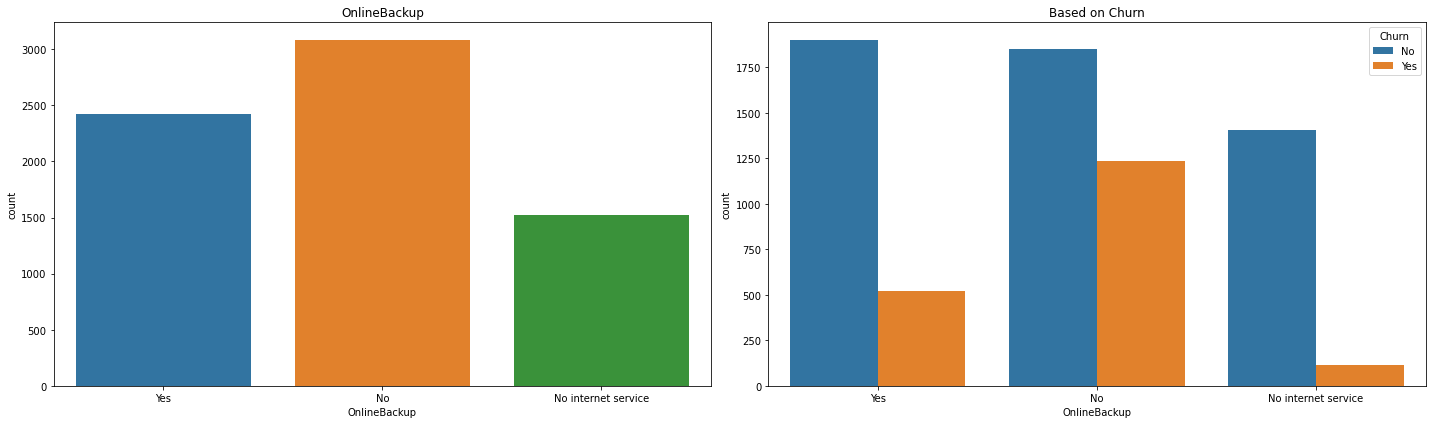

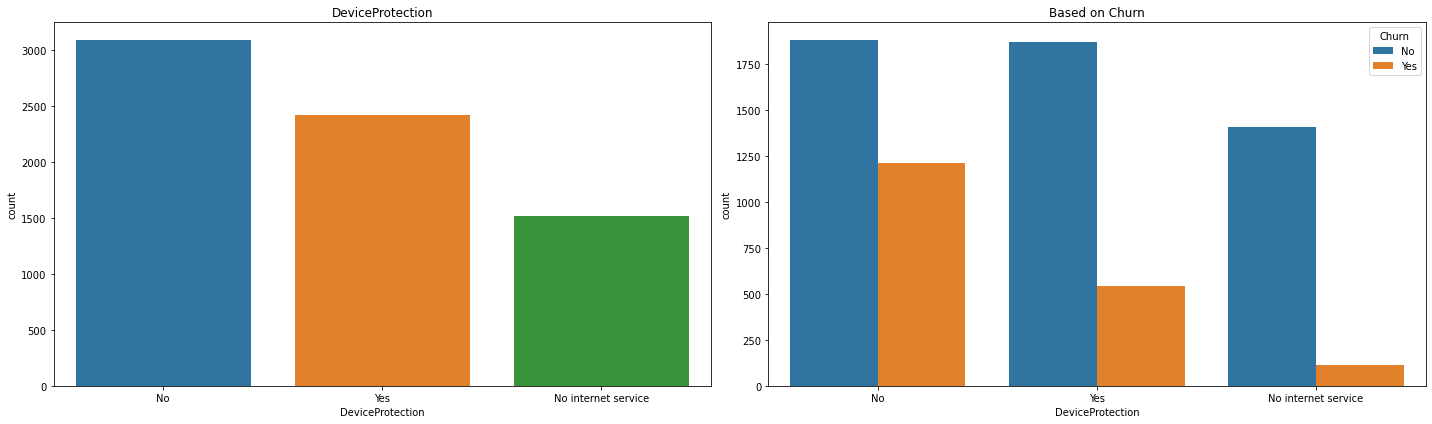

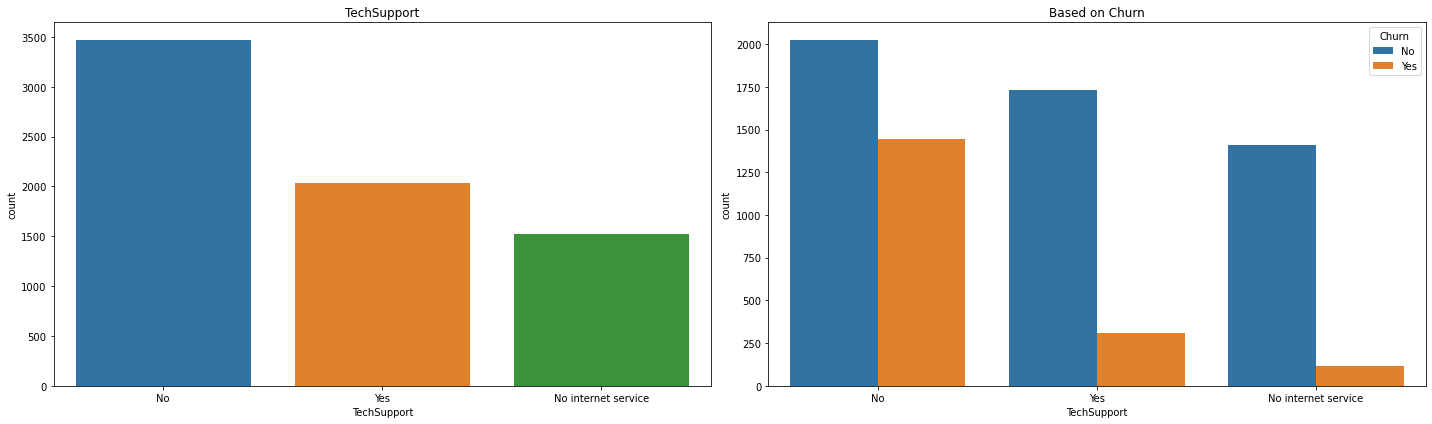

In [42]:
for z in categorical[1:-2]:
    if z == 'Churn':
        continue
    createfig(z) 

In [43]:
lt1=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']

In [44]:
for x in lt1:
    telecom[x].replace({'No':0,'Yes':1},inplace=True)

In [45]:
telecom

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,1,Two year,1,Bank transfer (automatic),21.15,1419.40,0,Female,...,0,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,6840-RESVB,24,1,One year,1,Mailed check,84.80,1990.50,0,Male,...,1,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,1,One year,1,Credit card (automatic),103.20,7362.90,0,Female,...,1,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,0,Month-to-month,1,Electronic check,29.60,346.45,0,Female,...,1,1,No phone service,DSL,Yes,No,No,No,No,No


In [46]:
telecom = telecom.drop(['customerID','gender','StreamingTV','StreamingMovies'], 1)

In [47]:
telecom

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,No,1,0,No phone service,DSL,No,Yes,No,No
1,34,1,One year,0,Mailed check,56.95,1889.50,0,No,0,0,No,DSL,Yes,No,Yes,No
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,No,0,0,No,DSL,Yes,Yes,No,No
3,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,No,0,0,No phone service,DSL,Yes,No,Yes,Yes
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,No,0,0,No,Fiber optic,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,72,1,Two year,1,Bank transfer (automatic),21.15,1419.40,0,No,0,0,No,No,No internet service,No internet service,No internet service,No internet service
7038,24,1,One year,1,Mailed check,84.80,1990.50,0,No,1,1,Yes,DSL,Yes,No,Yes,Yes
7039,72,1,One year,1,Credit card (automatic),103.20,7362.90,0,No,1,1,Yes,Fiber optic,No,Yes,Yes,No
7040,11,0,Month-to-month,1,Electronic check,29.60,346.45,0,No,1,1,No phone service,DSL,Yes,No,No,No


In [48]:
telecom_final = pd.get_dummies(telecom, drop_first = False)

In [49]:
telecom_final

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Partner,Dependents,Contract_Month-to-month,Contract_One year,...,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,1,0,1,29.85,29.85,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,...,1,1,0,0,0,0,1,1,0,0
2,2,1,1,53.85,108.15,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,1
4,2,1,1,70.70,151.65,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,72,1,1,21.15,1419.40,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7038,24,1,1,84.80,1990.50,0,1,1,0,1,...,1,1,0,0,0,0,1,0,0,1
7039,72,1,1,103.20,7362.90,0,1,1,0,1,...,0,0,0,1,0,0,1,1,0,0
7040,11,0,1,29.60,346.45,0,1,1,1,0,...,1,1,0,0,1,0,0,1,0,0


In [50]:
#telecom_final.drop(['customerID','gender','StreamingTV','StreamingMovies'], 1)

In [51]:
round(telecom_final[numerical].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
tenure,7031.0,32.42,24.54,1.00,9.00,29.00,55.00,72.00
MonthlyCharges,7031.0,64.79,30.08,18.25,35.58,70.35,89.85,118.75
TotalCharges,7031.0,2282.65,2266.28,18.80,401.40,1397.30,3793.05,8684.80


Text(0, 0.5, 'TotalCharges')

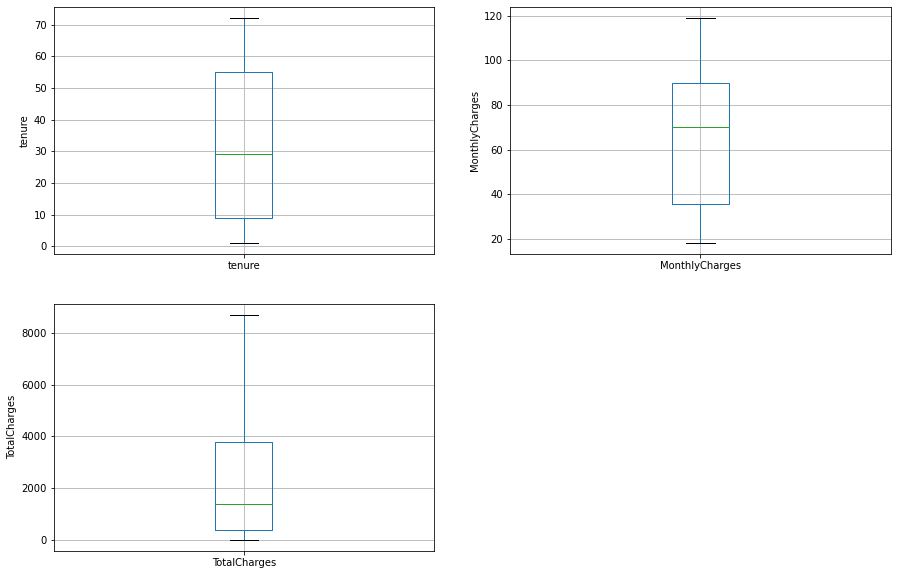

In [52]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = telecom_final.boxplot(column='tenure')
fig.set_title('')
fig.set_ylabel('tenure')


plt.subplot(2, 2, 2)
fig = telecom_final.boxplot(column='MonthlyCharges')
fig.set_title('')
fig.set_ylabel('MonthlyCharges')


plt.subplot(2, 2, 3)
fig = telecom_final.boxplot(column='TotalCharges')
fig.set_title('')
fig.set_ylabel('TotalCharges')

From the above boxplot we can conclude that there is no outliers in 'Telecom' data set

Text(0.5, 0, 'TotalCharges')

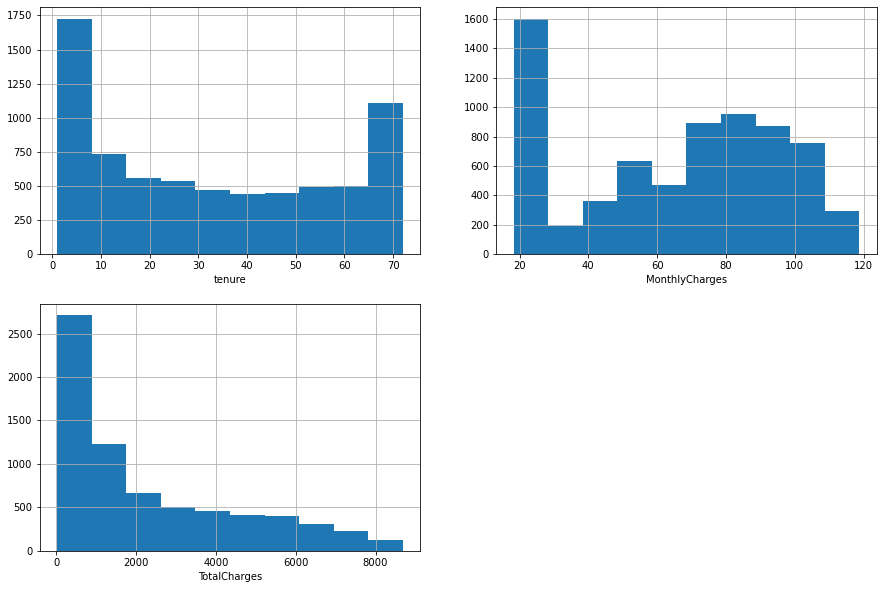

In [53]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
fig = telecom_final.tenure.hist(bins = 10)
fig.set_xlabel('tenure')

plt.subplot(2,2,2)
fig = telecom_final.MonthlyCharges.hist(bins = 10)
fig.set_xlabel('MonthlyCharges')

plt.subplot(2,2,3)
fig = telecom_final.TotalCharges.hist(bins = 10)
fig.set_xlabel('TotalCharges')

### Split data into separate training and test set

In [54]:
telecom_final

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Partner,Dependents,Contract_Month-to-month,Contract_One year,...,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,1,0,1,29.85,29.85,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,...,1,1,0,0,0,0,1,1,0,0
2,2,1,1,53.85,108.15,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,1
4,2,1,1,70.70,151.65,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,72,1,1,21.15,1419.40,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7038,24,1,1,84.80,1990.50,0,1,1,0,1,...,1,1,0,0,0,0,1,0,0,1
7039,72,1,1,103.20,7362.90,0,1,1,0,1,...,0,0,0,1,0,0,1,1,0,0
7040,11,0,1,29.60,346.45,0,1,1,1,0,...,1,1,0,0,1,0,0,1,0,0


In [55]:
# spliting X and y data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split( telecom_final,train_size=0.7, test_size=0.3, random_state=100)

In [56]:
# checking shape of the X_train and X_test
X_train.shape , X_test.shape

((4921, 35), (2110, 35))

In [57]:
X_train.dtypes

tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Partner                                      int64
Dependents                                   int64
Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year                            uint8
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic check               uint8
PaymentMethod_Mailed check                   uint8
SeniorCitizen_No                             uint8
SeniorCitizen_Yes                            uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes              

### Feature Scaling
it is extremely important to rescale the variables so that they have a comparable scale. So,we will use MinMax scaling.

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()

In [60]:
cols = list(X_train.columns)

In [61]:
X_train[cols] = scaler.fit_transform(X_train[cols])
X_train

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Partner,Dependents,Contract_Month-to-month,Contract_One year,...,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
879,0.450704,1.0,1.0,0.361236,0.189974,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5789,0.338028,1.0,0.0,0.013951,0.052655,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5008,0.070423,1.0,0.0,0.012456,0.011303,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
880,0.126761,1.0,1.0,0.913802,0.118210,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2784,0.042254,1.0,1.0,0.794220,0.043550,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.619718,1.0,1.0,0.074738,0.138208,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3934,0.126761,0.0,0.0,0.217738,0.045298,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5964,0.676056,1.0,0.0,0.431988,0.346790,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6947,0.943662,1.0,1.0,0.823617,0.779100,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [62]:
y_train = X_train.pop('Churn')

In [63]:
X_train

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Partner,Dependents,Contract_Month-to-month,Contract_One year,Contract_Two year,...,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
879,0.450704,1.0,1.0,0.361236,0.189974,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5789,0.338028,1.0,0.0,0.013951,0.052655,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5008,0.070423,1.0,0.0,0.012456,0.011303,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
880,0.126761,1.0,1.0,0.913802,0.118210,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2784,0.042254,1.0,1.0,0.794220,0.043550,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.619718,1.0,1.0,0.074738,0.138208,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3934,0.126761,0.0,0.0,0.217738,0.045298,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5964,0.676056,1.0,0.0,0.431988,0.346790,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6947,0.943662,1.0,1.0,0.823617,0.779100,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


### Model Building

In [64]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=100)

In [65]:
# Fitting the model

logreg.fit(X_train,y_train)

LogisticRegression(random_state=100, solver='liblinear')

In [66]:
# checking accuracy for training data

from sklearn.metrics import accuracy_score

y_pred_train = logreg.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.8049176996545417

In [67]:
colst=list(X_test.columns)
X_test[colst] = scaler.fit_transform(X_test[colst])

y_test = X_test.pop('Churn')
y_pred_test = logreg.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.8014218009478673

In [68]:
print('Training Accuracy: ' ,accuracy_score(y_train,y_pred_train))
print('Testing Accuracy: ' ,accuracy_score(y_test,y_pred_test))

Training Accuracy:  0.8049176996545417
Testing Accuracy:  0.8014218009478673


**There is no overfitting**

In [69]:
diff = (accuracy_score(y_train, y_pred_train) - accuracy_score(y_test, y_pred_test))*100
print(f' Variation between accuracy scores of Training and testing data is {diff}%')

 Variation between accuracy scores of Training and testing data is 0.34958987066744385%


In [70]:
# probability of getting output as 0 -

logreg.predict_proba(X_test)[:,0]

array([0.53312871, 0.99436084, 0.99074297, ..., 0.96070109, 0.58354976,
       0.99717497])

In [71]:
# probability of getting output as 1 -

logreg.predict_proba(X_test)[:,1]

array([0.46687129, 0.00563916, 0.00925703, ..., 0.03929891, 0.41645024,
       0.00282503])

# 

#### Checking accuracy variation for C = 100 i.e. lowering regularization

In [72]:
logreg_c100 =  LogisticRegression(C = 100, solver = 'liblinear', random_state = 100)
logreg_c100.fit(X_train,y_train)

LogisticRegression(C=100, random_state=100, solver='liblinear')

In [73]:
y_pred_train_c100 = logreg_c100.predict(X_train)
accuracy_score(y_train,y_pred_train_c100)

0.8065433854907539

In [74]:
y_pred_test_c100 = logreg_c100.predict(X_test)
accuracy_score(y_test,y_pred_test_c100)

0.8033175355450237

In [75]:
diff = (accuracy_score(y_train, y_pred_train) - accuracy_score(y_test, y_pred_test))*100
print(f' Variation between accuracy scores of Training and testing data is {diff}%')

 Variation between accuracy scores of Training and testing data is 0.34958987066744385%


# 

#### Checking accuracy variation for C = 0.01 i.e. increasing regularization 

In [76]:
logreg_c01 =  LogisticRegression(C = 0.01, solver = 'liblinear', random_state = 100)
logreg_c01.fit(X_train,y_train)

LogisticRegression(C=0.01, random_state=100, solver='liblinear')

In [77]:
y_pred_train_c01 = logreg_c01.predict(X_train)
accuracy_score(y_train,y_pred_train_c01 )

0.7982117455801666

In [78]:
y_pred_test_c01 = logreg_c01.predict(X_test)
accuracy_score(y_test,y_pred_test_c01)

0.7928909952606635

In [79]:
diff = (accuracy_score(y_train, y_pred_train_c01) - accuracy_score(y_test, y_pred_test_c01))*100
print(f' Variation between accuracy scores of Training and testing data is {diff}%')

 Variation between accuracy scores of Training and testing data is 0.5320750319503076%


# 

#### Checking accuracy variation for C = 0.001 i.e. increasing regularization

In [80]:
logreg_c001 =  LogisticRegression(C = 0.001, solver = 'liblinear', random_state = 50)
logreg_c001.fit(X_train,y_train)

LogisticRegression(C=0.001, random_state=50, solver='liblinear')

In [81]:
y_pred_train_c001 = logreg_c001.predict(X_train)
accuracy_score(y_train,y_pred_train_c001 )

0.7583824425929689

In [82]:
y_pred_test_c001 = logreg_c001.predict(X_test)
accuracy_score(y_test,y_pred_test_c001)

0.7483412322274882

In [83]:
diff = (accuracy_score(y_train, y_pred_train_c001) - accuracy_score(y_test, y_pred_test_c001))*100
print(f' Variation between accuracy scores of Training and testing data is {diff}%')

 Variation between accuracy scores of Training and testing data is 1.004121036548078%


Both training and testing accuracies increase with lowering regualrization and decrease with increasing regularization. The change however is negligible. Moreover doing either of them increase the difference between Test accuracy and Training accuracy so logistic regression model with regularization factor 1 is suitable for us.

In [84]:
y_test.value_counts()

0.0    1540
1.0     570
Name: Churn, dtype: int64

In [85]:
# check null accuracy score

null_accuracy = (1029/(1029+78))

print('Null accuracy score is:{0:0.4f}'. format(null_accuracy))

Null accuracy score is:0.9295


### Confusion matrix 

In [86]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_test)

print('Confusion Matrix:\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix:
 [[1375  165]
 [ 254  316]]

True Positives(TP) =  1375

True Negatives(TN) =  316

False Positives(FP) =  165

False Negatives(FN) =  254


<AxesSubplot:>

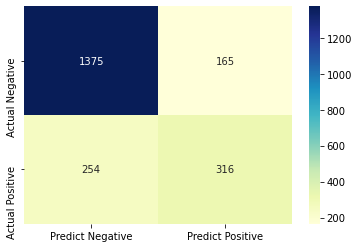

In [87]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])

sns.heatmap(cm_matrix, annot = True, fmt='d', cmap='YlGnBu')

### Classification Report

In [88]:
# Classification report Test

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1540
         1.0       0.66      0.55      0.60       570

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [89]:
# Classification report Train

from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      3622
         1.0       0.66      0.55      0.60      1299

    accuracy                           0.80      4921
   macro avg       0.75      0.72      0.73      4921
weighted avg       0.80      0.80      0.80      4921



In [90]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [91]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8014


In [92]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1986


In [93]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Precision : 0.8929
Recall or Sensitivity : 0.8441
True Positive Rate : 0.8441
False Positive Rate : 0.3430


### Adjusting the threshold level

In [94]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.53312871, 0.46687129],
       [0.99436084, 0.00563916],
       [0.99074297, 0.00925703],
       [0.36993191, 0.63006809],
       [0.99135825, 0.00864175],
       [0.31642579, 0.68357421],
       [0.72433786, 0.27566214],
       [0.9927602 , 0.0072398 ],
       [0.32369962, 0.67630038],
       [0.96324541, 0.03675459]])

<AxesSubplot:ylabel='Count'>

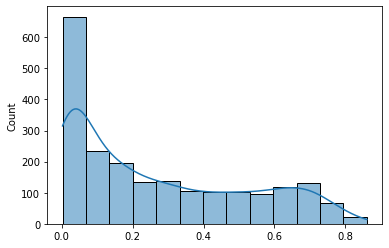

In [95]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]
sns.histplot(y_pred1, kde = True)

The histogram of prediction values is highly skewed. This is because most customers will not churn.

<AxesSubplot:ylabel='Count'>

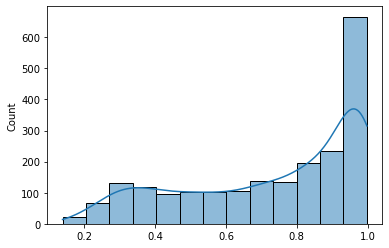

In [96]:
y_pred0 = logreg.predict_proba(X_test)[:, 0]
sns.histplot(y_pred0, kde = True)

### Lower the threshold

In [97]:
# we will check accuracy for various cutoff thresholds

from sklearn.preprocessing import binarize

for i in range (1,9):
    cm1 = 0
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    cm1 = confusion_matrix(y_test, y_pred2)
    TP = cm1[1,1]
    TN = cm1[0,0]
    FP = cm1[0,1]
    FN = cm1[1,0]
    Accuracy  = (accuracy_score(y_test, y_pred2))
    Precision  = (TP/(TP+FP))  
    Sensitivity =(TP/(TP+FN))
    Specificity = (TN/(TN+FP))
    F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
    print(f'With {i/10} threshold the Confusion Matrix is')
    print(cm1)
    print('Correct Predictions:' ,TP+TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    print('Accuracy:',Accuracy)
    print('Precision:',Precision)
    print('Sensitivity:',Sensitivity)
    print('Specificity:',Specificity)
    print('F1:', F1)
    print('\n\n')


With 0.1 threshold the Confusion Matrix is
[[749 791]
 [ 31 539]]
Correct Predictions: 1288
False Positives: 791
False Negatives: 31
Accuracy: 0.6104265402843602
Precision: 0.4052631578947368
Sensitivity: 0.9456140350877194
Specificity: 0.4863636363636364
F1: 0.5673684210526316



With 0.2 threshold the Confusion Matrix is
[[1003  537]
 [  91  479]]
Correct Predictions: 1482
False Positives: 537
False Negatives: 91
Accuracy: 0.7023696682464455
Precision: 0.4714566929133858
Sensitivity: 0.8403508771929824
Specificity: 0.6512987012987013
F1: 0.6040353089533418



With 0.3 threshold the Confusion Matrix is
[[1171  369]
 [ 142  428]]
Correct Predictions: 1599
False Positives: 369
False Negatives: 142
Accuracy: 0.7578199052132701
Precision: 0.5370138017565872
Sensitivity: 0.7508771929824561
Specificity: 0.7603896103896104
F1: 0.626188734455011



With 0.4 threshold the Confusion Matrix is
[[1277  263]
 [ 197  373]]
Correct Predictions: 1650
False Positives: 263
False Negatives: 197
Accuracy

### ROC - AUC

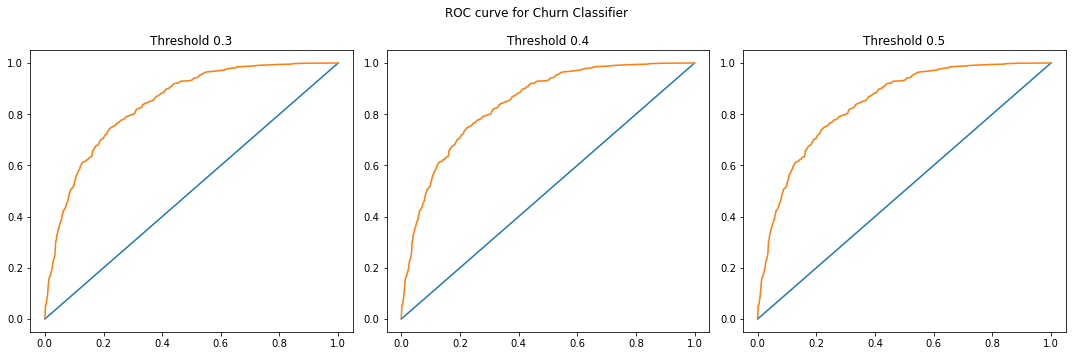

In [98]:
# plot ROC Curve

from sklearn.metrics import roc_curve
y_pred3 = logreg_c100.predict_proba(X_test)[:,1]

y_pred4 = logreg_c100.predict_proba(X_test)[:,1]

y_pred5 = logreg_c100.predict_proba(X_test)[:,1]

fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred3)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred4)
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred5)


fig, axs = plt.subplots(1,3, figsize = (15,5))
plt.suptitle('ROC curve for Churn Classifier')
axs[0].set_title('Threshold 0.3')
sns.lineplot([0,1], [0,1], ax = axs[0] )
sns.lineplot(fpr3, tpr3, ax = axs[0] )
axs[1].set_title('Threshold 0.4')
sns.lineplot([0,1], [0,1], ax = axs[1])
sns.lineplot(fpr4, tpr4, ax = axs[1] )
axs[2].set_title('Threshold 0.5')
sns.lineplot([0,1], [0,1], ax = axs[2] )
sns.lineplot(fpr5, tpr5, ax = axs[2] )
plt.tight_layout()

In [99]:
from sklearn.metrics import roc_auc_score
print('ROC AUC 0.3: {:.4f}'.format(roc_auc_score(y_test, y_pred3)))
print('ROC AUC 0.4: {:.4f}'.format(roc_auc_score(y_test, y_pred4)))
print('ROC AUC 0.5: {:.4f}'.format(roc_auc_score(y_test, y_pred5)))

ROC AUC 0.3: 0.8417
ROC AUC 0.4: 0.8417
ROC AUC 0.5: 0.8417


In [100]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg_c100, X_train, y_train, cv = 5, scoring = 'roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8456


### k-Fold Cross Validation

In [101]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg_c100, X_train, y_train, cv = 5, scoring ='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80101523 0.79878049 0.79369919 0.80995935 0.81097561]


In [102]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8029


### Hyperparameter Optimization using GridSearch CV

In [103]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=100, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [104]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8029


Parameters that give the best results : 

 {'C': 100}


Estimator that was chosen by the search : 

 LogisticRegression(C=100, random_state=100, solver='liblinear')


In [105]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8033


**Results:**

Our best suited model is LogisticRegression(C=100)

Suitable Threshold values, 0.3, 0.4, 0.5

when using this mode we get following scores:

Training Accuracy: 0.8065433854907539


Testing Accuracy:  0.8033175355450237


Variation between accuracy scores of Training and testing data is 0.34958987066744385%

                                    **Logistic Regression ends here**

# 

# Decision Tree Classifier

#### Decision Tree Classifier with criterion gini index 

In [106]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 50)

# fit the model
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=50)

In [107]:
# Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [108]:
# Check accuracy score with criterion gini index

from sklearn.metrics import accuracy_score

print('Model accuracy score with creation gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with creation gini index: 0.7882


In [109]:
# Check accuracy score with criterion gini index on train dataset

y_pred_gini_train = clf_gini.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_gini_train)))

Training-set accuracy score: 0.7988


In [110]:
# Compare the train-set and test-set accuracy

In [111]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7988
Test set score: 0.7882


In [112]:
print('Difference between train data accuracy and test data accuracy is:{:.4f}'.format(clf_gini.score(X_train, y_train)-
                                                                                       clf_gini.score(X_test, y_test)))

Difference between train data accuracy and test data accuracy is:0.0107


In [113]:
parameters = [{'max_depth':[3,4,5]}]



grid_search = GridSearchCV(estimator = clf_gini,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(X_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.7960


Parameters that give the best results : 

 {'max_depth': 4}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=4, random_state=50)
GridSearch CV score on test set: 0.7882


#### Visualize Decision Trees

[Text(558.0, 978.48, 'X[7] <= 0.5\ngini = 0.389\nsamples = 4921\nvalue = [3622, 1299]'),
 Text(279.0, 761.0400000000001, 'X[3] <= 0.751\ngini = 0.121\nsamples = 2194\nvalue = [2052, 142]'),
 Text(139.5, 543.6, 'X[9] <= 0.5\ngini = 0.078\nsamples = 1659\nvalue = [1592, 67]'),
 Text(69.75, 326.1600000000001, 'X[3] <= 0.514\ngini = 0.133\nsamples = 751\nvalue = [697, 54]'),
 Text(34.875, 108.72000000000003, 'gini = 0.093\nsamples = 530\nvalue = [504, 26]'),
 Text(104.625, 108.72000000000003, 'gini = 0.221\nsamples = 221\nvalue = [193, 28]'),
 Text(209.25, 326.1600000000001, 'X[3] <= 0.737\ngini = 0.028\nsamples = 908\nvalue = [895, 13]'),
 Text(174.375, 108.72000000000003, 'gini = 0.026\nsamples = 902\nvalue = [890, 12]'),
 Text(244.125, 108.72000000000003, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(418.5, 543.6, 'X[8] <= 0.5\ngini = 0.241\nsamples = 535\nvalue = [460, 75]'),
 Text(348.75, 326.1600000000001, 'X[3] <= 0.756\ngini = 0.13\nsamples = 271\nvalue = [252, 19]'),
 Text(3

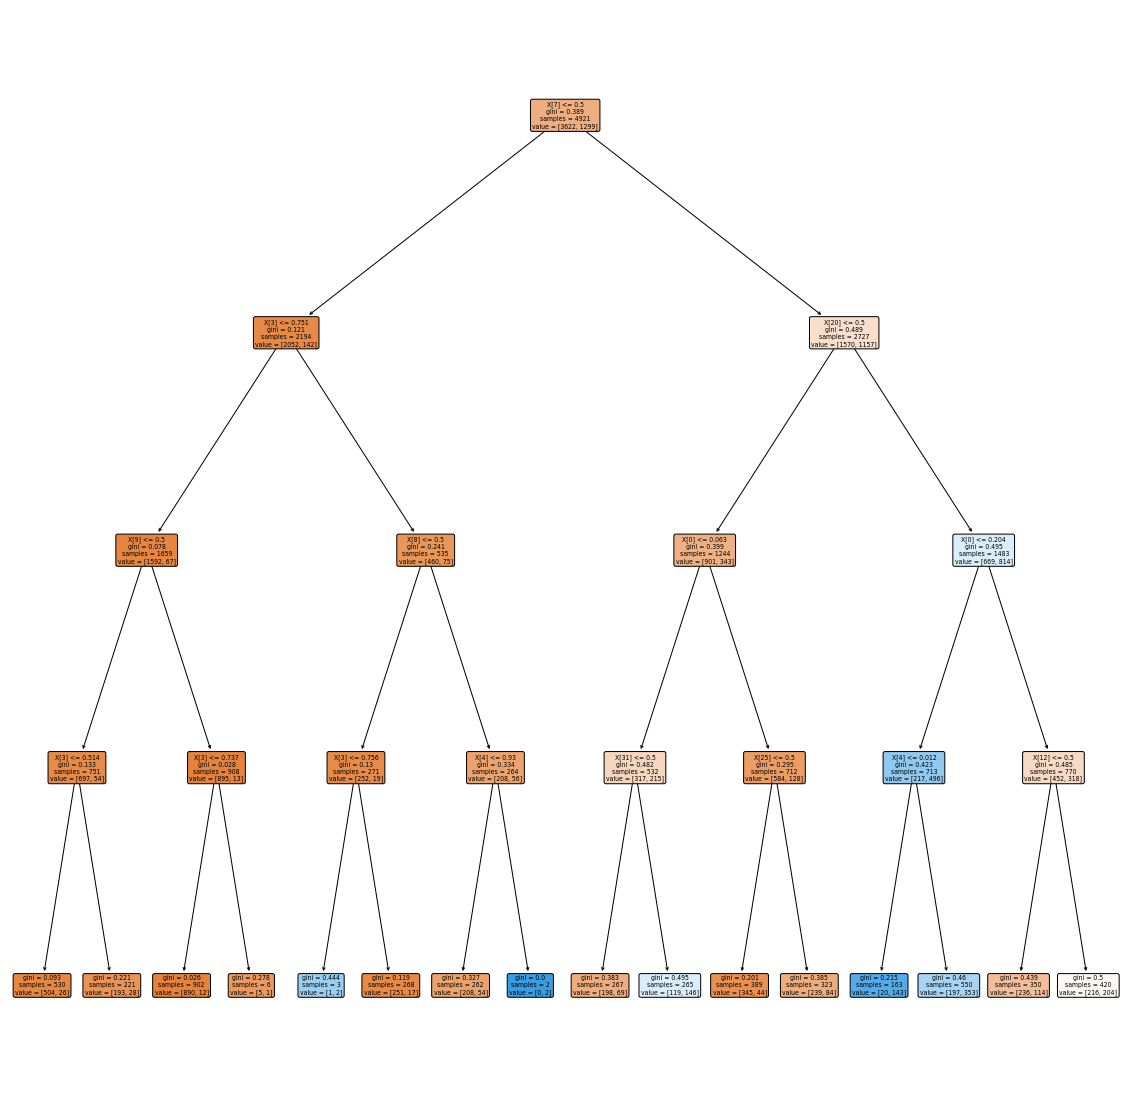

In [114]:
plt.figure(figsize=(20,20))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train),rounded=True ,filled = True) 

#### Decision Tree Classifier with criterion entropy

In [115]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [116]:
train_en_predictions = clf_en.predict(X_train)
test_en_predictions = clf_en.predict(X_test)
print('Training Accuracy: ' ,accuracy_score(y_train, train_en_predictions))
print('Testing Accuracy: ' ,accuracy_score(y_test, test_en_predictions))

Training Accuracy:  0.7988213777687462
Testing Accuracy:  0.7881516587677725


In [117]:
print('Difference between train data accuracy and test data accuracy is:{:.4f}'.format(accuracy_score(y_train, train_en_predictions)
                                                                                       -
                                                                                      accuracy_score(y_test, test_en_predictions)))

Difference between train data accuracy and test data accuracy is:0.0107


In [118]:
parameters = [{'max_depth':[3,4,5]}]



grid_search = GridSearchCV(estimator = clf_en,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)


grid_search.fit(X_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.7952


Parameters that give the best results : 

 {'max_depth': 4}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
GridSearch CV score on test set: 0.7882


[Text(558.0, 978.48, 'X[7] <= 0.5\nentropy = 0.833\nsamples = 4921\nvalue = [3622, 1299]'),
 Text(279.0, 761.0400000000001, 'X[8] <= 0.5\nentropy = 0.346\nsamples = 2194\nvalue = [2052, 142]'),
 Text(139.5, 543.6, 'X[3] <= 0.737\nentropy = 0.18\nsamples = 1179\nvalue = [1147, 32]'),
 Text(69.75, 326.1600000000001, 'X[12] <= 0.5\nentropy = 0.102\nsamples = 902\nvalue = [890, 12]'),
 Text(34.875, 108.72000000000003, 'entropy = 0.084\nsamples = 853\nvalue = [844, 9]'),
 Text(104.625, 108.72000000000003, 'entropy = 0.332\nsamples = 49\nvalue = [46, 3]'),
 Text(209.25, 326.1600000000001, 'X[4] <= 0.905\nentropy = 0.374\nsamples = 277\nvalue = [257, 20]'),
 Text(174.375, 108.72000000000003, 'entropy = 0.454\nsamples = 210\nvalue = [190, 20]'),
 Text(244.125, 108.72000000000003, 'entropy = 0.0\nsamples = 67\nvalue = [67, 0]'),
 Text(418.5, 543.6, 'X[3] <= 0.514\nentropy = 0.495\nsamples = 1015\nvalue = [905, 110]'),
 Text(348.75, 326.1600000000001, 'X[0] <= 0.782\nentropy = 0.282\nsamples = 5

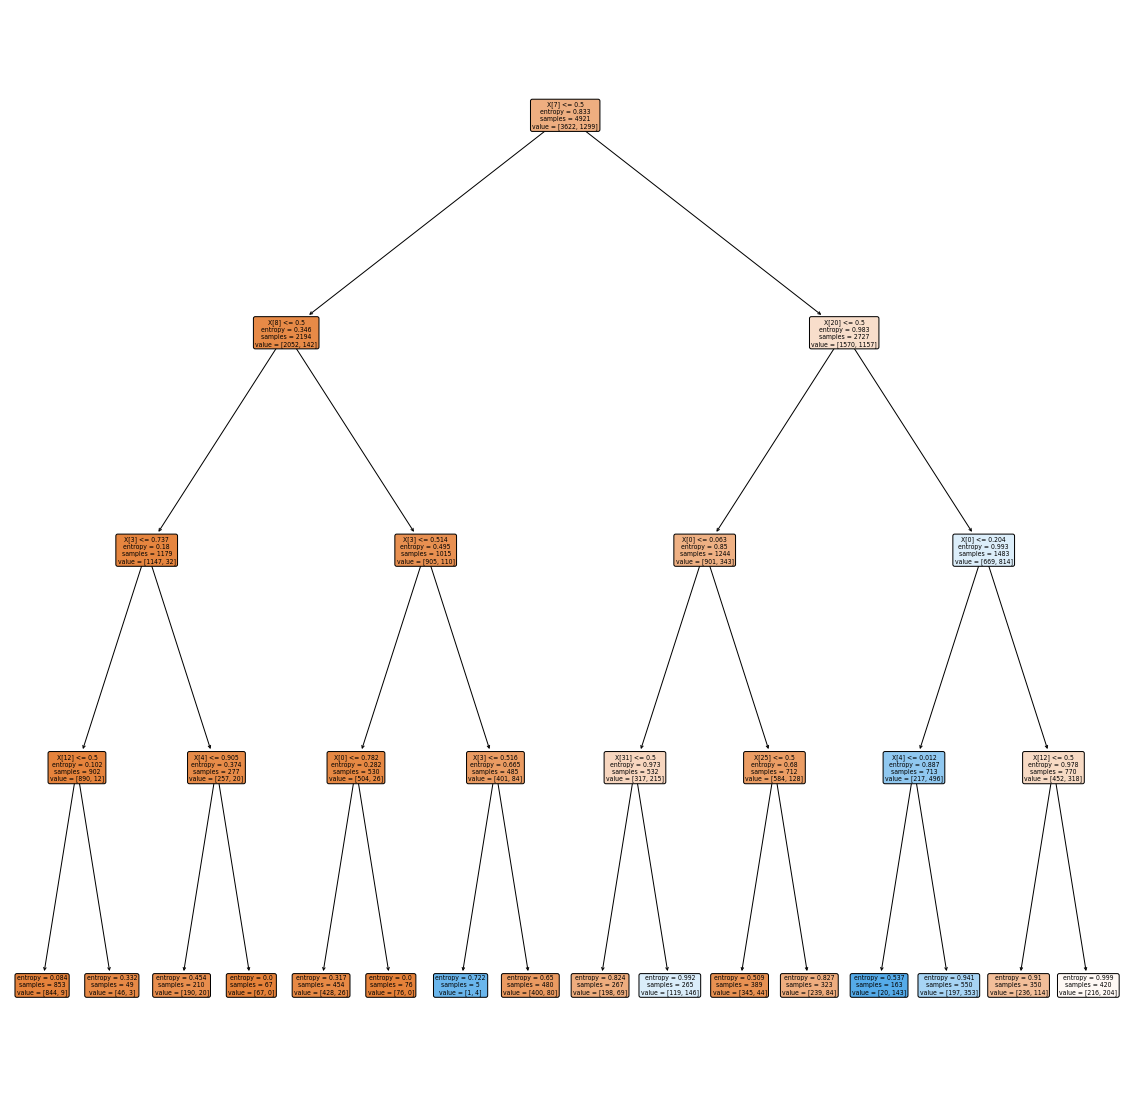

In [119]:
plt.figure(figsize=(20,20))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train),filled = True,rounded=True)


#### Confusion matrix 

In [120]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1384  156]
 [ 291  279]]


<AxesSubplot:>

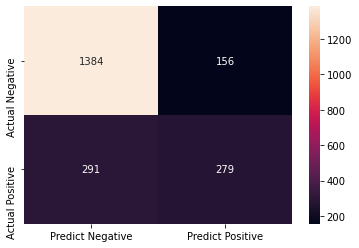

In [121]:
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

#### Classification Report 

In [122]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1540
         1.0       0.64      0.49      0.56       570

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



                                    **Decision Tree Classifier ends here**

# 

# Random Forest Classifier

In [123]:
#Import Random Forest Classifier Model

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc = RandomForestClassifier(n_estimators=100,random_state= 100,max_depth=3 ,criterion='gini') 

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=100)

In [124]:
y_pred_rfc_train = rfc.predict(X_train)
y_pred_rfc_test = rfc.predict(X_test)

In [125]:
from sklearn import metrics

print('Training accuracy: ', accuracy_score(y_train, y_pred_rfc_train))
print('Testing accuracy: ', accuracy_score(y_test, y_pred_rfc_test))

Training accuracy:  0.7886608412924202
Testing accuracy:  0.7853080568720379


In [126]:
print(classification_report(y_test, y_pred_rfc_test))

              precision    recall  f1-score   support

         0.0       0.79      0.95      0.87      1540
         1.0       0.73      0.33      0.45       570

    accuracy                           0.79      2110
   macro avg       0.76      0.64      0.66      2110
weighted avg       0.78      0.79      0.75      2110



[[1470   70]
 [ 383  187]]


<AxesSubplot:>

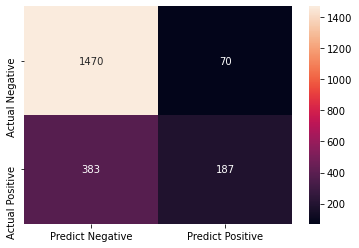

In [127]:
cm = confusion_matrix(y_test, y_pred_rfc_test )
print(cm)
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

In [128]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
Accuracy  = (accuracy_score(y_test, y_pred_rfc_test))
Precision  = (TP/(TP+FP))  
Sensitivity =(TP/(TP+FN))
Specificity = (TN/(TN+FP))
F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
print('Correct Predictions:' ,TP+TN)
print('False Positives:', FP)
print('False Negatives:', FN)
print('Accuracy:',Accuracy)
print('Precision:',Precision)
print('Sensitivity:',Sensitivity)
print('Specificity:',Specificity)
print('F1:', F1)
 

Correct Predictions: 1657
False Positives: 70
False Negatives: 383
Accuracy: 0.7853080568720379
Precision: 0.7276264591439688
Sensitivity: 0.3280701754385965
Specificity: 0.9545454545454546
F1: 0.45223700120918986


In [129]:
feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Contract_Month-to-month                    0.160783
tenure                                     0.147554
OnlineSecurity_No                          0.131648
PaymentMethod_Electronic check             0.070180
TechSupport_No                             0.067395
Contract_Two year                          0.066140
InternetService_Fiber optic                0.061585
TotalCharges                               0.051163
OnlineBackup_No                            0.037945
MonthlyCharges                             0.034018
DeviceProtection_No                        0.024971
InternetService_DSL                        0.020701
OnlineSecurity_Yes                         0.018655
Contract_One year                          0.017297
TechSupport_No internet service            0.015701
InternetService_No                         0.013103
TechSupport_Yes                            0.012247
DeviceProtection_No internet service       0.011695
OnlineSecurity_No internet service         0.010311
OnlineBackup

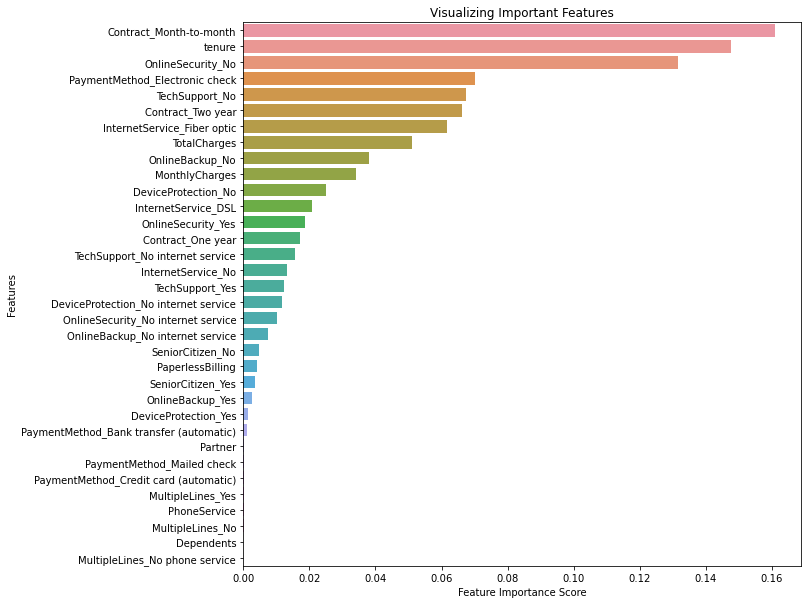

In [130]:
# Creating a bar plot

plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

In [131]:
parameters = [{'max_depth':[3,4,5]}, {'criterion': ['gini','entrophy']}]



grid_search = GridSearchCV(estimator = rfc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=1)


grid_search.fit(X_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

print('\nGridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    9.9s finished


GridSearch CV best score : 0.7994


Parameters that give the best results : 

 {'max_depth': 5}


Estimator that was chosen by the search : 

 RandomForestClassifier(max_depth=5, random_state=100)

GridSearch CV score on test set: 0.7962


In [132]:
# Using best parameters value again build model and find accuracy and important features

In [133]:
rfc = RandomForestClassifier(n_estimators=100,random_state= 100,max_depth=5 ,criterion='gini') 

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=100)

In [134]:
y_pred_rfc_train = rfc.predict(X_train)
y_pred_rfc_test = rfc.predict(X_test)

In [135]:
from sklearn import metrics

print('Training accuracy: ', accuracy_score(y_train, y_pred_rfc_train))
print('Testing accuracy: ', accuracy_score(y_test, y_pred_rfc_test))

Training accuracy:  0.8085754927860191
Testing accuracy:  0.7962085308056872


In [136]:
feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

tenure                                     0.157865
Contract_Month-to-month                    0.155250
OnlineSecurity_No                          0.094365
InternetService_Fiber optic                0.075454
TotalCharges                               0.074700
TechSupport_No                             0.065666
PaymentMethod_Electronic check             0.064293
Contract_Two year                          0.057619
MonthlyCharges                             0.045935
OnlineBackup_No                            0.030205
DeviceProtection_No                        0.020218
Contract_One year                          0.016724
InternetService_DSL                        0.016437
OnlineSecurity_Yes                         0.014196
InternetService_No                         0.013029
OnlineSecurity_No internet service         0.012385
DeviceProtection_No internet service       0.012362
TechSupport_No internet service            0.011565
PaperlessBilling                           0.010154
TechSupport_

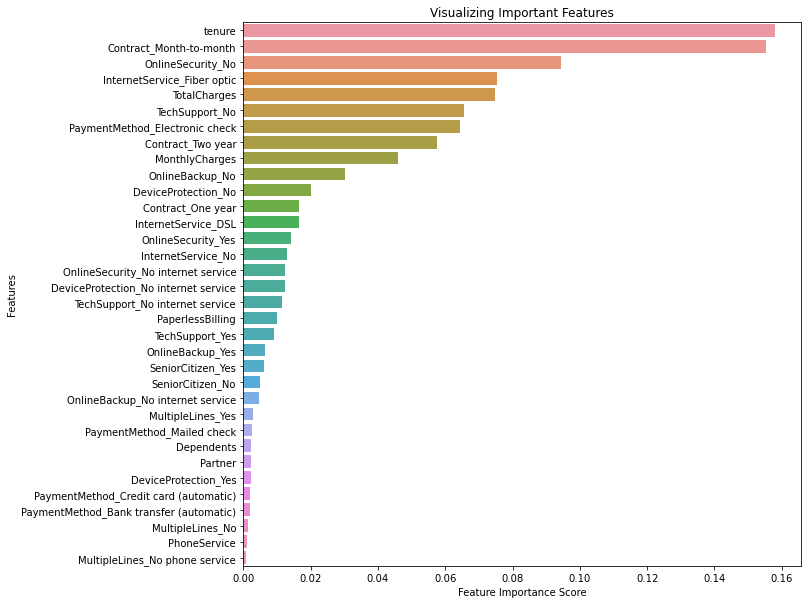

In [137]:
# Creating a bar plot

plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

                                   **Random Forest Classifier ends here**

# 

# XGBoost        
(Extreme Gradient Boosting)


XGBoost is also known as a "regularized boosting" technique.


XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.


In [138]:
# import XGBClassifier

In [139]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [140]:
# define the model
#xgb_clf = XGBClassifier(n_estimators = 100, subsample = 0.9, colsample_bynode = 0.2)

# define the model evaluation procedur
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

In [141]:
# declare parameters

parameters = {
                'objective':'binary:logistic',
                'max_depth':3,
                'alpha':10,
                'learning_rate':1.0,
                'n_estimators':100,
                'eval_metric':'logloss'
              }

# instantiate the classifier 
xgb_clf = XGBClassifier(**parameters)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [142]:
y_pred_xgb_train = xgb_clf.predict(X_train)
y_pred_xgb_test = xgb_clf.predict(X_test)

In [143]:
print('Training accuracy: ', accuracy_score(y_train, y_pred_xgb_train))
print('Testing accuracy: ', accuracy_score(y_test, y_pred_xgb_test))

Training accuracy:  0.8250355618776671
Testing accuracy:  0.7914691943127962


In [144]:
print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1540
         1.0       0.64      0.52      0.57       570

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



<AxesSubplot:>

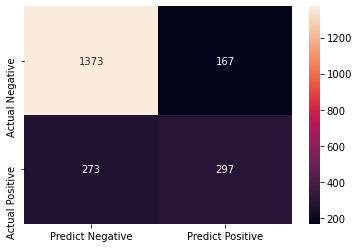

In [145]:
cm = confusion_matrix(y_test, y_pred_xgb_test )
mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
sns.heatmap(mat, annot = True, fmt = 'd')

In [146]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
Accuracy  = (accuracy_score(y_test, y_pred_xgb_test ))
Precision  = (TP/(TP+FP))  
Sensitivity =(TP/(TP+FN))
Specificity = (TN/(TN+FP))
F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
print('Correct Predictions:' ,TP+TN)
print('False Positives:', FP)
print('False Negatives:', FN)
print('Accuracy:',Accuracy)
print('Precision:',Precision)
print('Sensitivity:',Sensitivity)
print('Specificity:',Specificity)
print('F1:', F1)

Correct Predictions: 1670
False Positives: 167
False Negatives: 273
Accuracy: 0.7914691943127962
Precision: 0.6400862068965517
Sensitivity: 0.5210526315789473
Specificity: 0.8915584415584416
F1: 0.5744680851063829


<AxesSubplot:>

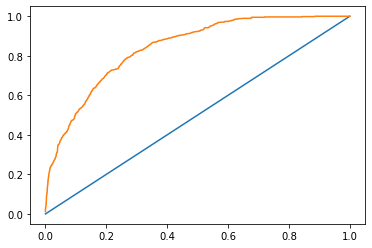

In [147]:
y_pred = xgb_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

In [148]:
print('ROC AUC: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC: 0.8409


In [149]:
y_pred_train = xgb_clf.predict_proba(X_train)[:,1]
print('ROC AUC: {:.4f}'.format(roc_auc_score(y_train, y_pred_train)))

ROC AUC: 0.8696


In [150]:
scores = cross_val_score(xgb_clf, X_train, y_train, cv = 10, scoring='accuracy')


print('Cross-validation scores:{}'.format(scores))
print('\nAverage 10 fold Cross Validation Accuracy for testing data: ', scores.mean())

Cross-validation scores:[0.81744422 0.81097561 0.81910569 0.78658537 0.79065041 0.79065041
 0.81300813 0.81097561 0.79674797 0.81097561]

Average 10 fold Cross Validation Accuracy for testing data:  0.8047119015814905


In [151]:
scores = cross_val_score(xgb_clf, X_train, y_train, cv = 10, scoring='roc_auc')


print('Cross-validation scores:{}'.format(scores))
print('\nAverage 10 fold Cross Validation ROC AUC for testing data: ', scores.mean())

Cross-validation scores:[0.86680441 0.85984582 0.85528049 0.83029112 0.84128772 0.83133234
 0.86031662 0.83116235 0.80814917 0.86154909]

Average 10 fold Cross Validation ROC AUC for testing data:  0.8446019113939581


In [152]:
feature_imp = pd.Series(xgb_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

InternetService_Fiber optic                0.375340
Contract_Month-to-month                    0.307876
OnlineSecurity_No                          0.137669
Contract_Two year                          0.092517
tenure                                     0.022146
PaperlessBilling                           0.016845
SeniorCitizen_No                           0.006788
MultipleLines_No                           0.006031
TotalCharges                               0.004914
Contract_One year                          0.004523
MonthlyCharges                             0.003988
PaymentMethod_Electronic check             0.003956
InternetService_DSL                        0.003680
TechSupport_No                             0.003639
OnlineBackup_No                            0.002086
DeviceProtection_Yes                       0.001870
OnlineSecurity_Yes                         0.001486
MultipleLines_Yes                          0.001400
Dependents                                 0.001265
Partner     

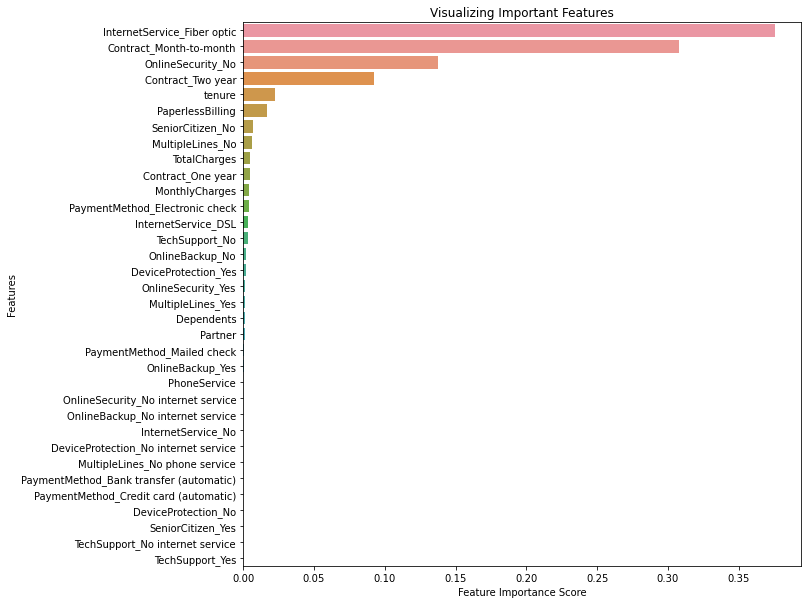

In [153]:
# Creating a bar plot

plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

### Hyperparameter Tuning of XGBoost

In [154]:
xgb_clf

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [155]:
xgb_clf.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 1.0,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 10,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'alpha': 10,
 'eval_metric': 'logloss'}

In [156]:

def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds )
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
  
        
    #Predict training set:
    #dtest_predictions = alg.predict(dtrain[predictors])
   # dtest_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
     #Predict testing set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))   
  
    importance = alg.feature_importances_.argsort()
    importance = importance[::-1] # reversing the list  descending order
    feat_imp=pd.DataFrame({
    'cols':dtrain.columns[importance],
    'imps':alg.feature_importances_[importance]
})
# plot feature importance
    plt.figure(figsize = (10,10))
    sns.barplot(y = 'cols', x = 'imps', orient = 'h', data = feat_imp)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features\n")


Model Report
Accuracy : 0.8154
AUC Score (Train): 0.863950


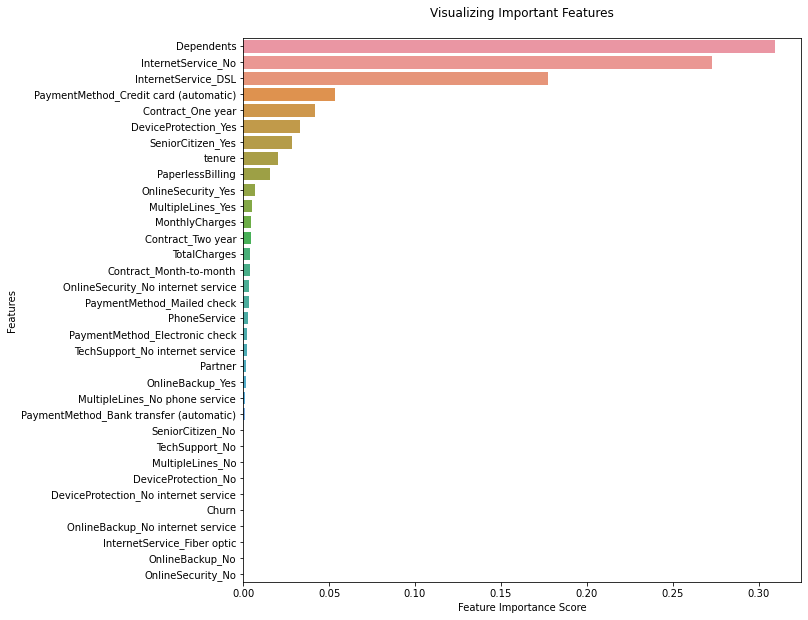

In [157]:
#Choose all predictors except target & IDcols

lst = [x for x in telecom_final.columns if x not in ['Churn']]
target = 'Churn'

modelfit(xgb_clf, telecom_final, lst, target)

In [158]:
xgb_clf

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [159]:
def best_fit(model, xtrain, ytrain, parameters, cv_rounds=5, scoring='roc_auc'):
    grid_search = GridSearchCV(estimator = model, param_grid = parameters,
                              scoring = scoring,
                              cv = cv_rounds,
                              verbose = 1)
    grid_search.fit(xtrain,ytrain)
    
# best score achieved during the GridSearchCV
    print('\nGridSearch CV best score : {:.4f}\n'.format(grid_search.best_score_))

# print parameters that give the best results
    print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
    print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
    return grid_search.best_estimator_

In [160]:
parameters = {
                'learning_rate':[x/100 for x in range(45,55)],
                'max_depth':[3,4,6,7,9],
                'min_child_weight': range(1,10,2)
             }

xgb_tuned_1 = best_fit(xgb_clf, X_train, y_train, parameters)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



GridSearch CV best score : 0.8506

Parameters that give the best results : 

 {'learning_rate': 0.45, 'max_depth': 3, 'min_child_weight': 7}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.45, max_delta_step=0,
              max_depth=3, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed:  1.3min finished


In [162]:
y_pred_train = xgb_tuned_1.predict_proba(X_train)[:,1]
y_pred = xgb_tuned_1.predict_proba(X_test)[:,1]
print('ROC AUC train: {:.4f}'.format(roc_auc_score(y_train, y_pred_train)))
print('ROC AUC test: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC train: 0.8629
ROC AUC test: 0.8416


In [163]:
parameters = {
             'gamma':[i/100.0 for i in range(0,10)],
             'subsample':[i/10.0 for i in range(1,10)],
             'colsample_bytree':[i/10.0 for i in range(1,10)]
             }

xgb_tuned_2 = best_fit(xgb_clf, X_train, y_train, parameters)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



GridSearch CV best score : 0.8489

Parameters that give the best results : 

 {'colsample_bytree': 0.6, 'gamma': 0.09, 'subsample': 0.9}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='logloss',
              gamma=0.09, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done 4050 out of 4050 | elapsed:  2.8min finished


In [164]:
y_pred_train = xgb_tuned_2.predict_proba(X_train)[:,1]
y_pred = xgb_tuned_2.predict_proba(X_test)[:,1]
print('ROC AUC train: {:.4f}'.format(roc_auc_score(y_train, y_pred_train)))
print('ROC AUC test: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC train: 0.8657
ROC AUC test: 0.8399


In [165]:
parameters = {
             'reg_alpha':range(1,11,2),
             'reg_lambda':[i/10.0 for i in range(1,100,5)]
             }

xgb_tuned_3 = best_fit(xgb_clf, X_train, y_train, parameters)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



GridSearch CV best score : 0.8457

Parameters that give the best results : 

 {'reg_alpha': 9, 'reg_lambda': 8.6}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=9, reg_lambda=8.6,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   20.1s finished


In [166]:
y_pred_train = xgb_tuned_3.predict_proba(X_train)[:,1]
y_pred = xgb_tuned_3.predict_proba(X_test)[:,1]
print('ROC AUC train: {:.4f}'.format(roc_auc_score(y_train, y_pred_train)))
print('ROC AUC test: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC train: 0.8679
ROC AUC test: 0.8408


In [167]:
parameters = {
             'scale_pos_weight':range(-5,5)
             }

xgb_tuned_4 = best_fit(xgb_clf, X_train, y_train, parameters)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



GridSearch CV best score : 0.8442

Parameters that give the best results : 

 {'scale_pos_weight': 1}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1.0, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished


In [168]:
y_pred_train = xgb_tuned_4.predict_proba(X_train)[:,1]
y_pred = xgb_tuned_4.predict_proba(X_test)[:,1]
print('ROC AUC train: {:.4f}'.format(roc_auc_score(y_train, y_pred_train)))
print('ROC AUC test: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC train: 0.8679
ROC AUC test: 0.8407


In [169]:
# Using all the best parameters and their respective values obtained by parameters tuning 

parameters = {
            'learning_rate': [0.45], 
            'max_depth': [3], 
            'min_child_weight': [7],
            'colsample_bytree': [0.6], 
            'gamma': [0.09], 
            'subsample': [0.9],
            'reg_alpha': [9], 
            'reg_lambda': [8.6], 
            'scale_pos_weight': [1]
             }

xgb_tuned_final = best_fit(xgb_clf, X_train, y_train, parameters)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



GridSearch CV best score : 0.8485

Parameters that give the best results : 

 {'colsample_bytree': 0.6, 'gamma': 0.09, 'learning_rate': 0.45, 'max_depth': 3, 'min_child_weight': 7, 'reg_alpha': 9, 'reg_lambda': 8.6, 'scale_pos_weight': 1, 'subsample': 0.9}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='logloss',
              gamma=0.09, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.45, max_delta_step=0,
              max_depth=3, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=9, reg_lambda=8.6,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [170]:
y_pred_train = xgb_tuned_final.predict_proba(X_train)[:,1]
y_pred = xgb_tuned_final.predict_proba(X_test)[:,1]
print('ROC AUC train: {:.4f}'.format(roc_auc_score(y_train, y_pred_train)))
print('ROC AUC test: {:.4f}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC train: 0.8601
ROC AUC test: 0.8422



Model Report
Accuracy : 0.8138
AUC Score (Train): 0.858698


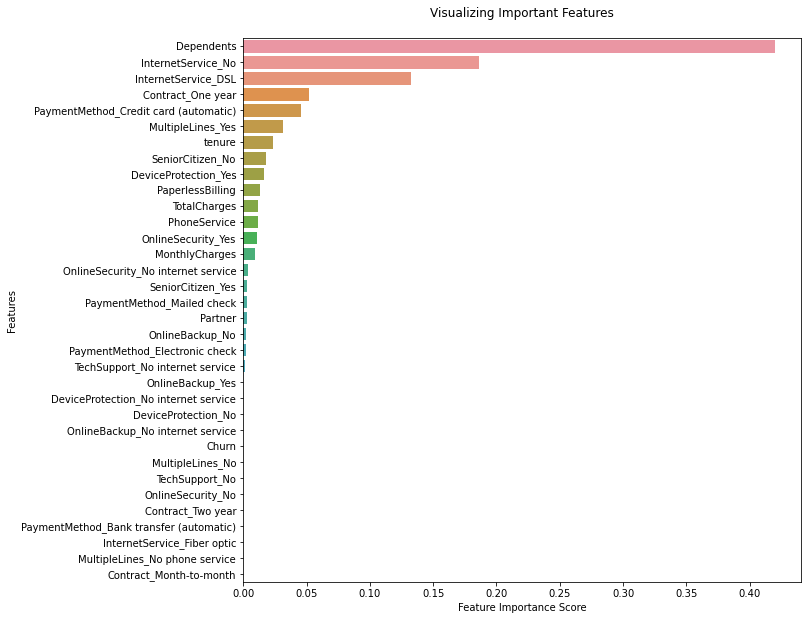

In [171]:
lst = [x for x in telecom_final.columns if x not in ['Churn']]
target = 'Churn'

modelfit(xgb_tuned_final, telecom_final, lst, target)

                                   **Hyperparameter Tuning of XGBoost ends here**